In [1]:
%matplotlib inline
from chesslab_.agent_torch import agent
from chesslab_.agent_mcts_2 import agent_MCTS, MCTS_graph
#from chesslab_.agent_stockfish import agent as s_agent
from chesslab_.tests import kaufman_test
from chesslab_.utils import join_and_sort
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from IPython.display import display
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
import torch.nn as nn
class Model_0(nn.Module):

    def __init__(self):
        super().__init__()
        #self.func_1=nn.ReLU()
        #self.func_2=nn.ReLU()
        #self.func_3=nn.ReLU()
        #self.func_4=nn.ReLU()
        
        self.func_1=nn.ELU()
        self.func_2=nn.ELU()
        self.func_3=nn.ELU()
        self.func_4=nn.ELU()
        
        #self.d1 = nn.Dropout(0.5)
        #self.d2 = nn.Dropout(0.5)
        #self.d3 = nn.Dropout(0.5)
        #self.d4 = nn.Dropout(0.5)
        
        #self.b1= nn.BatchNorm2d(32)
        #self.b2= nn.BatchNorm2d(64)
        #self.b3= nn.BatchNorm2d(128)
        #self.b4 = nn.BatchNorm1d(256)
        
        self.cnn_1 = nn.Conv2d(3, 32, kernel_size=7,padding=3)
        self.cnn_2 = nn.Conv2d(32, 64, kernel_size=5,padding=2)
        self.cnn_3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)

        self.linear_1 = nn.Linear(8*8*128,256 )
        self.linear_2 = nn.Linear(256, 2)

    def forward(self, x ):
        out = self.cnn_1(x)
        #out = self.b1(out)
        out = self.func_1(out)
        #out = self.d1(out)
        out = self.cnn_2(out)
        #out = self.b2(out)
        out = self.func_2(out)
        #out = self.d2(out)
        out = self.cnn_3(out)
        #out = self.b3(out)
        out = self.func_3(out)
        #out = self.d3(out)
        out = out.reshape([x.size(0), -1])
        out = self.linear_1(out)
        #out = self.b4(out)
        out = self.func_4(out)
        #out = self.d4(out)
        out = self.linear_2(out)

        return out
model = Model_0()

In [3]:
a = 2
a = a+1 if False else a-1
a

1

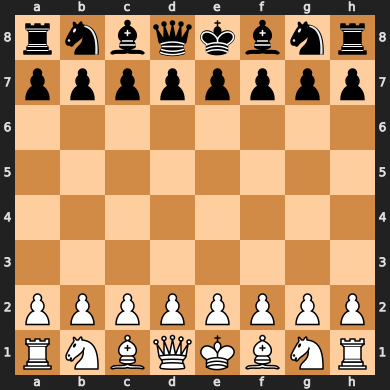

In [4]:
board=chess.Board()
board

In [5]:
base_name = './tmp/test_noeaten.0.'
deepbot = agent(base_name+'3.pt',model)
move=deepbot.select_move(board)
move

Move.from_uci('d2d4')

In [6]:
moves,values=deepbot.get_move_values(board,both_players=True)

In [7]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [8]:
np.round(values.tolist())

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [9]:
deepMCTS = agent_MCTS(temperature=2,bot=deepbot,game_state=board,verbose=1)

In [10]:
moves,values=deepMCTS.get_move_values(board)

MCTS - rollouts:100 Elapsed time: 1.03s = 0.02m


In [11]:
moves

[Move.from_uci('d2d4'),
 Move.from_uci('d2d3'),
 Move.from_uci('a2a3'),
 Move.from_uci('f2f3'),
 Move.from_uci('g1f3'),
 Move.from_uci('g2g3'),
 Move.from_uci('b2b4'),
 Move.from_uci('e2e3'),
 Move.from_uci('b2b3'),
 Move.from_uci('g2g4'),
 Move.from_uci('b1a3'),
 Move.from_uci('e2e4'),
 Move.from_uci('f2f4'),
 Move.from_uci('g1h3'),
 Move.from_uci('h2h4'),
 Move.from_uci('b1c3'),
 Move.from_uci('h2h3'),
 Move.from_uci('a2a4'),
 Move.from_uci('c2c4'),
 Move.from_uci('c2c3')]

In [12]:
values

array([0.69695091, 0.6627956 , 0.64226763, 0.64850006, 0.6584363 ,
       0.65463423, 0.6382195 , 0.64186637, 0.63859844, 0.65357987,
       0.64555825, 0.65544147, 0.65218283, 0.66850437, 0.64743543,
       0.66517422, 0.66500985, 0.64266847, 0.66982696, 0.65337572])

In [13]:
join_and_sort(moves,values)

array([[Move.from_uci('d2d4'), 0.6969509124755859],
       [Move.from_uci('c2c4'), 0.6698269645373026],
       [Move.from_uci('g1h3'), 0.6685043692588806],
       [Move.from_uci('b1c3'), 0.6651742160320282],
       [Move.from_uci('h2h3'), 0.6650098462899526],
       [Move.from_uci('d2d3'), 0.6627956032752991],
       [Move.from_uci('g1f3'), 0.6584362983703613],
       [Move.from_uci('e2e4'), 0.6554414749145507],
       [Move.from_uci('g2g3'), 0.6546342253684998],
       [Move.from_uci('g2g4'), 0.6535798668861389],
       [Move.from_uci('c2c3'), 0.6533757150173187],
       [Move.from_uci('f2f4'), 0.6521828293800354],
       [Move.from_uci('f2f3'), 0.6485000550746918],
       [Move.from_uci('h2h4'), 0.6474354267120361],
       [Move.from_uci('b1a3'), 0.6455582499504089],
       [Move.from_uci('a2a4'), 0.6426684657732645],
       [Move.from_uci('a2a3'), 0.6422676324844361],
       [Move.from_uci('e2e3'), 0.6418663740158081],
       [Move.from_uci('b2b3'), 0.6385984420776367],
       [Move

MCTS - rollouts:200 Elapsed time: 1.08s = 0.02m


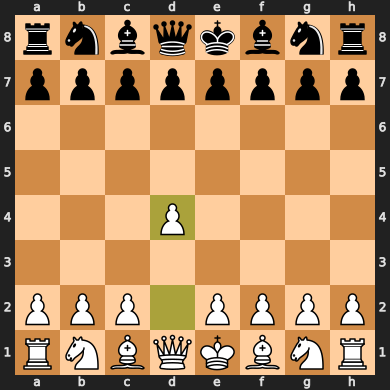

In [14]:
move=deepMCTS.select_move(board)
board.push(move)
board

In [15]:
acc,acc_w,boards,data = kaufman_test(deepbot,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 7/25 = 0.28 | weighted = 0.78
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 6 & 48 & 0.8936 & 0.6028 & c1c7 & 0.8570  \\
02 & f5d4 & 21 & 39 & 0.4737 & 0.6340 & a5d2 & 0.8480  \\
03 & e1d1 & 21 & 38 & 0.4595 & 0.5060 & f2c5 & 0.9166  \\
04 & b1b2 & 1 & 47 & 1.0000 & 0.7354 & b1b2 & 0.7354  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.9494 & c8c3 & 0.9652  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.5175 & a3a2 & 0.5175  \\
07 & b7e4 & 28 & 33 & 0.1562 & 0.4157 & c8e8 & 0.5566  \\
08 & h7h6 & 11 & 39 & 0.7368 & 0.3948 & e1c1 & 0.8030  \\
09 & f3e2 & 8 & 35 & 0.7941 & 0.5897 & d2h6 & 0.7519  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.7615 & c7a5 & 0.7646  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.8507 & g3f5 & 0.8507  \\
12 & c6d6 & 14 & 41 & 0.6750 & 0.0049 & e7e4 & 0.0164  \\
13 & c3d5 & 8 & 30 & 0.7586 & 0.9945 & f1f6 & 0.9999  \\
14 & b1b2 & 39 & 49 & 0.2083 & 0.3167 & d3g6 & 0.9083  \\
15 & d3f5 & 6 & 5

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.602791,c1c7,0.857030,6,48,0.893617
1,f5d4,0.634004,a5d2,0.848028,21,39,0.473684
2,e1d1,0.505972,f2c5,0.916630,21,38,0.459459
3,b1b2,0.735360,b1b2,0.735360,1,47,1.000000
4,g5c1,0.949427,c8c3,0.965190,2,48,0.978723
5,a3a2,0.517546,a3a2,0.517546,1,31,1.000000
6,b7e4,0.415699,c8e8,0.556603,28,33,0.156250
7,h7h6,0.394792,e1c1,0.802965,11,39,0.736842
8,f3e2,0.589749,d2h6,0.751859,8,35,0.794118
9,d5c3,0.761462,c7a5,0.764555,2,41,0.975000


In [16]:
acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
MCTS - rollouts:100 Elapsed time: 1.80s = 0.03m
2
MCTS - rollouts:100 Elapsed time: 1.71s = 0.03m
3
MCTS - rollouts:100 Elapsed time: 1.63s = 0.03m
4
MCTS - rollouts:100 Elapsed time: 2.04s = 0.03m
5
MCTS - rollouts:100 Elapsed time: 1.72s = 0.03m
6
MCTS - rollouts:100 Elapsed time: 1.46s = 0.02m
7
MCTS - rollouts:100 Elapsed time: 1.78s = 0.03m
8
MCTS - rollouts:100 Elapsed time: 1.48s = 0.02m
9
MCTS - rollouts:100 Elapsed time: 1.74s = 0.03m
10
MCTS - rollouts:100 Elapsed time: 1.71s = 0.03m
11
MCTS - rollouts:100 Elapsed time: 1.45s = 0.02m
12
MCTS - rollouts:100 Elapsed time: 1.53s = 0.03m
13
MCTS - rollouts:100 Elapsed time: 1.28s = 0.02m
14
MCTS - rollouts:100 Elapsed time: 2.12s = 0.04m
15
MCTS - rollouts:100 Elapsed time: 1.74s = 0.03m
16
MCTS - rollouts:100 Elapsed time: 0.43s = 0.01m
17
MCTS - rollouts:100 Elapsed time: 1.63s = 0.03m
18
MCTS - rollouts:100 Elapsed time: 1.58s = 0.03m
19
MCTS - rollouts:100 Elapsed time: 1.48s = 0.02m
20
MCTS - rollouts:100 Ela

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.601804,c1c7,0.865688,5,48,0.914894
1,f5d4,0.443687,a5d2,0.864047,37,39,0.052632
2,e1d1,0.403167,f2c5,0.871533,24,38,0.378378
3,b1b2,0.769533,b1b2,0.769533,1,47,1.000000
4,g5c1,0.954063,c8c3,0.973180,2,48,0.978723
5,a3a2,0.528692,a3a2,0.528692,1,31,1.000000
6,b7e4,0.452234,c8e8,0.548016,20,33,0.406250
7,h7h6,0.394792,e1c1,0.827561,14,39,0.657895
8,f3e2,0.559670,d2g5,0.718912,8,35,0.794118
9,d5c3,0.805936,d5c3,0.805936,1,41,1.000000


In [17]:
deepMCTS.set_max_iter(1000)
acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
MCTS - rollouts:1000 Elapsed time: 20.25s = 0.34m
2
MCTS - rollouts:1000 Elapsed time: 17.82s = 0.30m
3
MCTS - rollouts:1000 Elapsed time: 16.86s = 0.28m
4
MCTS - rollouts:1000 Elapsed time: 19.31s = 0.32m
5
MCTS - rollouts:1000 Elapsed time: 18.02s = 0.30m
6
MCTS - rollouts:1000 Elapsed time: 12.94s = 0.22m
7
MCTS - rollouts:1000 Elapsed time: 15.36s = 0.26m
8
MCTS - rollouts:1000 Elapsed time: 15.53s = 0.26m
9
MCTS - rollouts:1000 Elapsed time: 14.54s = 0.24m
10
MCTS - rollouts:1000 Elapsed time: 17.65s = 0.29m
11
MCTS - rollouts:1000 Elapsed time: 15.82s = 0.26m
12
MCTS - rollouts:1000 Elapsed time: 15.07s = 0.25m
13
MCTS - rollouts:1000 Elapsed time: 12.93s = 0.22m
14
MCTS - rollouts:1000 Elapsed time: 20.54s = 0.34m
15
MCTS - rollouts:1000 Elapsed time: 20.47s = 0.34m
16
MCTS - rollouts:1000 Elapsed time: 4.60s = 0.08m
17
MCTS - rollouts:1000 Elapsed time: 18.86s = 0.31m
18
MCTS - rollouts:1000 Elapsed time: 14.51s = 0.24m
19
MCTS - rollouts:1000 Elapsed time: 16.8

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.610567,c1c7,0.867599,6,48,0.893617
1,f5d4,0.625865,a5d2,0.838221,14,39,0.657895
2,e1d1,0.505972,f2c5,0.866770,14,38,0.648649
3,b1b2,0.756637,b1b2,0.756637,1,47,1.000000
4,g5c1,0.876557,g5c1,0.876557,1,48,1.000000
5,a3a2,0.527243,a3a2,0.527243,1,31,1.000000
6,b7e4,0.407250,c8e8,0.532765,28,33,0.156250
7,h7h6,0.435342,e1c1,0.771117,12,39,0.710526
8,f3e2,0.534026,d2h6,0.659478,8,35,0.794118
9,d5c3,0.703824,d5c3,0.703824,1,41,1.000000


In [18]:
deepMCTS.set_max_iter(10000)
acc,acc_w,boards,data = kaufman_test(deepMCTS,details=2)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
MCTS - rollouts:10000 Elapsed time: 155.11s = 2.59m
2
MCTS - rollouts:10000 Elapsed time: 158.02s = 2.63m
3
MCTS - rollouts:10000 Elapsed time: 166.11s = 2.77m
4
MCTS - rollouts:10000 Elapsed time: 203.40s = 3.39m
5
MCTS - rollouts:10000 Elapsed time: 161.51s = 2.69m
6
MCTS - rollouts:10000 Elapsed time: 149.17s = 2.49m
7
MCTS - rollouts:10000 Elapsed time: 172.99s = 2.88m
8
MCTS - rollouts:10000 Elapsed time: 130.03s = 2.17m
9
MCTS - rollouts:10000 Elapsed time: 157.93s = 2.63m
10
MCTS - rollouts:10000 Elapsed time: 159.44s = 2.66m
11
MCTS - rollouts:10000 Elapsed time: 114.79s = 1.91m
12
MCTS - rollouts:10000 Elapsed time: 154.79s = 2.58m
13
MCTS - rollouts:10000 Elapsed time: 107.73s = 1.80m
14
MCTS - rollouts:10000 Elapsed time: 192.93s = 3.22m
15
MCTS - rollouts:10000 Elapsed time: 151.44s = 2.52m
16
MCTS - rollouts:10000 Elapsed time: 42.45s = 0.71m
17
MCTS - rollouts:10000 Elapsed time: 135.03s = 2.25m
18
MCTS - rollouts:10000 Elapsed time: 150.90s = 2.52m
19
MCT

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.597382,c1c7,0.849899,7,48,0.872340
1,f5d4,0.543392,a5d2,0.777802,25,39,0.368421
2,e1d1,0.442178,f2c5,0.671845,25,38,0.351351
3,b1b2,0.759344,b1b2,0.759344,1,47,1.000000
4,g5c1,0.685320,g5c1,0.685320,1,48,1.000000
5,a3a2,0.463628,a3a2,0.463628,1,31,1.000000
6,b7e4,0.396710,c7d8,0.487446,28,33,0.156250
7,h7h6,0.414376,e1c1,0.560119,9,39,0.789474
8,f3e2,0.561104,d2h6,0.751859,7,35,0.823529
9,d5c3,0.638358,d5c3,0.638358,1,41,1.000000


In [19]:
G = MCTS_graph(deepMCTS)
G.save_graph("mcts.dot",depth=2)

Total nodes: 163
Grafo guardado en: mcts.dot


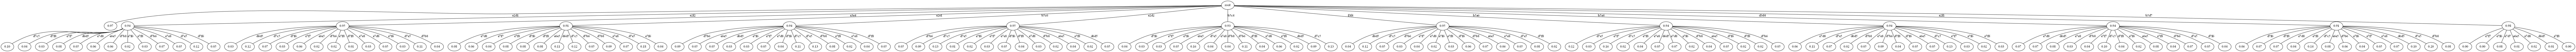

In [20]:
g = nx.Graph(nx.drawing.nx_pydot.read_dot("mcts.dot"))
p=nx.drawing.nx_pydot.to_pydot(g)
p.write_png('example.png')
pil_im = Image.open('example.png', 'r')
display(pil_im)

In [21]:
stop

NameError: name 'stop' is not defined

In [ ]:
import chess.svg
from IPython.display import display
#deepbot = chess_torch_agent('./tmp/model_v1.0.2.h5')
acc,boards,best_moves,move_details,data = kaufman_test(deepbot,details=2)
print('Accuracy: {}'.format(acc))
for i in range(1):
    print('='*50)
    display(chess.svg.board(boards[i],size=350))
    print('best move / move predicted: {} / {}'.format(best_moves[i],move_details[i][0][0]))
    for j,(m,v) in enumerate(move_details[i]):
        print('{:02d} - move: {}: {:.4f}'.format(j+1,m,v))

In [ ]:
import chess.svg
from IPython.display import display
deepbot = agent('{}{}.pt'.format(base_name,1),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

In [ ]:
deepbot = agent('{}{}.pt'.format(base_name,2),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

In [ ]:
deepbot = agent('{}{}.pt'.format(base_name,3),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

In [ ]:
deepbot = agent('{}{}.pt'.format(base_name,30),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

In [ ]:
exact_acc = np.zeros(30)
for i in range(1,30+1):
    deepbot = agent('{}{}.pt'.format(base_name,i),model)
    acc  = kaufman_test(deepbot,details=0)
    exact_acc[i-1]=acc
    print('Epoca: {}, accuracy: {}'.format(i,acc))

train_acc_model = np.array(deepbot.history['train']['acc'])
test_acc_model = np.array(deepbot.history['test']['acc'])


In [ ]:
valuable_acc = np.zeros(30)
for i in range(1,30+1):
    deepbot = agent('{}{}.pt'.format(base_name,i),model)
    acc  = kaufman_test(deepbot,details=3)
    valuable_acc[i-1]=acc
    print('Epoca: {}, accuracy: {}'.format(i,acc))

In [ ]:
path = 'E:/database/stockfish_14.exe'
deepbot = s_agent(path)
ss = kaufman_test(deepbot)
print("Exactitud para función de stockfish usando prueba de kaufman {}".format(ss))
ssp  = kaufman_test(deepbot,details=3)
print("Exactitud para función de stockfish usando prueba de kaufman ponderada {}".format(ssp))
ss = np.repeat(ss,30)
ssp = np.repeat(ssp,30)

In [ ]:
x = np.arange(30)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,valuable_acc*100)
plt.plot(x,ss*100,linestyle='dashed')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Accuracy per training epoch')
plt.xlabel('Training epoch')
plt.ylabel('Accuracy')
plt.legend(['Training set NN','Test set NN','Kaufman test (NN)','Kaufman Test weighted (NN)','Kaufman test (S)','Kaufman test weighted(S)'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [ ]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(30):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*valuable_acc[i]))